![範例圖片](https://github.com/guanyuhoujeff/113_NKUST_Advanced_Econometrics/blob/main/homework4/HW4-exam-1.png?raw=true)

![範例圖片](https://github.com/guanyuhoujeff/113_NKUST_Advanced_Econometrics/blob/main/homework4/HW4-exam-2.png?raw=true)

<p>
<br>Q1. Use R or python to print  the following table:  
<br>1+1=; 1+2=; 1+3=;
<br>2+1=; 2+2=; 2+3=; 
<br>3+1=; 3+2=; 3+3=; 
<p>

In [8]:
# 打印 3x3 的加法表

for i in range(1, 4):  # 外層循環：1 到 3
    for j in range(1, 4):  # 內層循環：1 到 3
        print(f"{i}+{j}={i+j}", end="; ")  # 打印加法表達式，不換行
    print()  # 每完成一行後換行

1+1=2; 1+2=3; 1+3=4; 
2+1=3; 2+2=4; 2+3=5; 
3+1=4; 3+2=5; 3+3=6; 


<p>
<br>Q2. For equation x=x^(1/3)-5, 
<br>use newton method
<br>to solve x
<p>

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def f(x):
    return x**(1/3) - 5 - x

def f_prime(x):
    return 1/(3*x**(2/3)) - 1

def newton_method(initial_guess, tolerance=1e-7, max_iterations=100):
    x = initial_guess
    for i in range(max_iterations):
        fx = f(x)
        if abs(fx) < tolerance:
            return x
        x = x - fx / f_prime(x)
    return x  # 如果達到最大迭代次數仍未收斂,返回最後的值

# 使用牛頓法求解
initial_guess = 4.0  # 初始猜測值
solution = newton_method(initial_guess)

print(f"方程 x=x^(1/3)-5 的解約為: {solution:.7f}")
print(f"驗證: {solution:.7f}^(1/3) - 5 = {solution**(1/3) - 5:.7f}")

方程 x=x^(1/3)-5 的解約為: -4.0479196+1.3112480j
驗證: -4.0479196+1.3112480j^(1/3) - 5 = -4.0479196+1.3112480j


Solution of x=x^(1/3)-5 is approximately: -4.0479196+1.3112480j
Verification: -4.0479196+1.3112480j^(1/3) - 5 = -4.0479196+1.3112480j
Number of iterations: 4


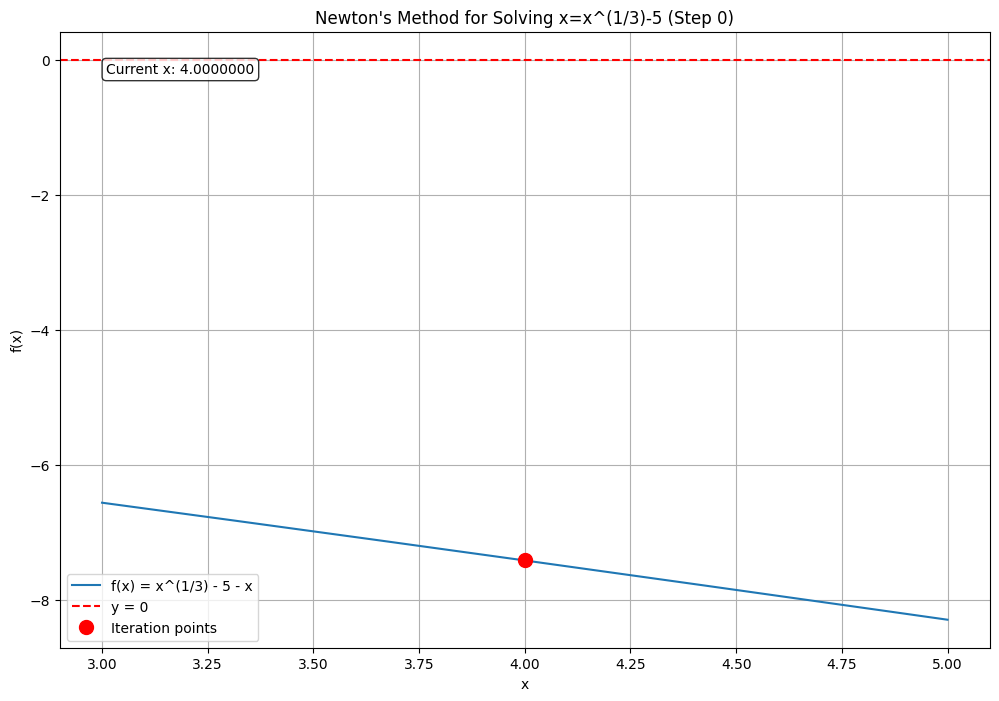

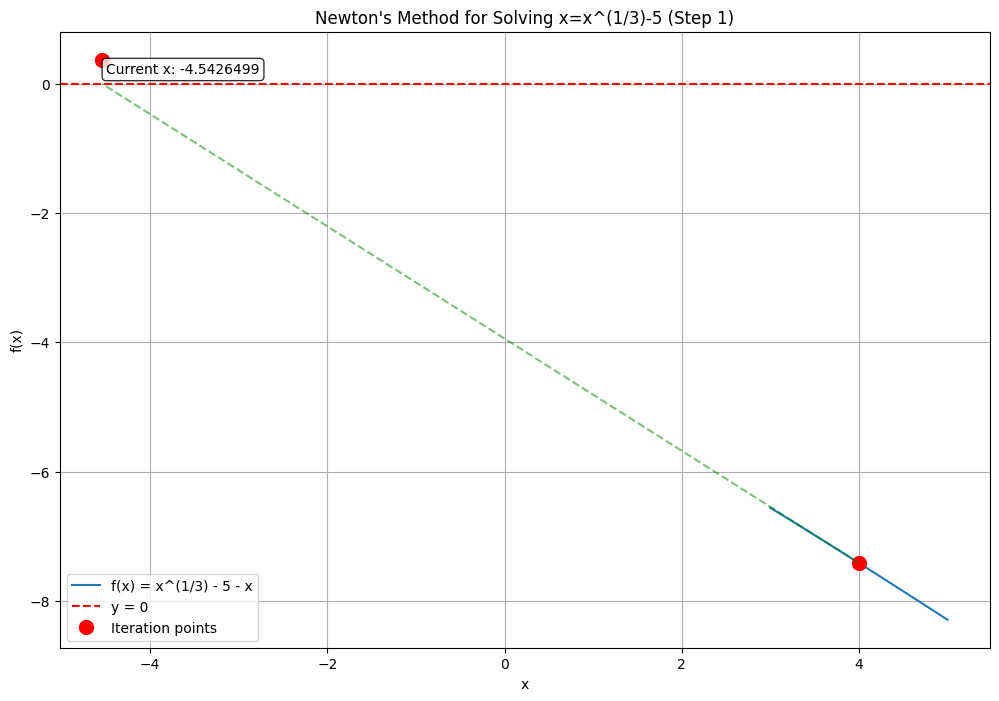

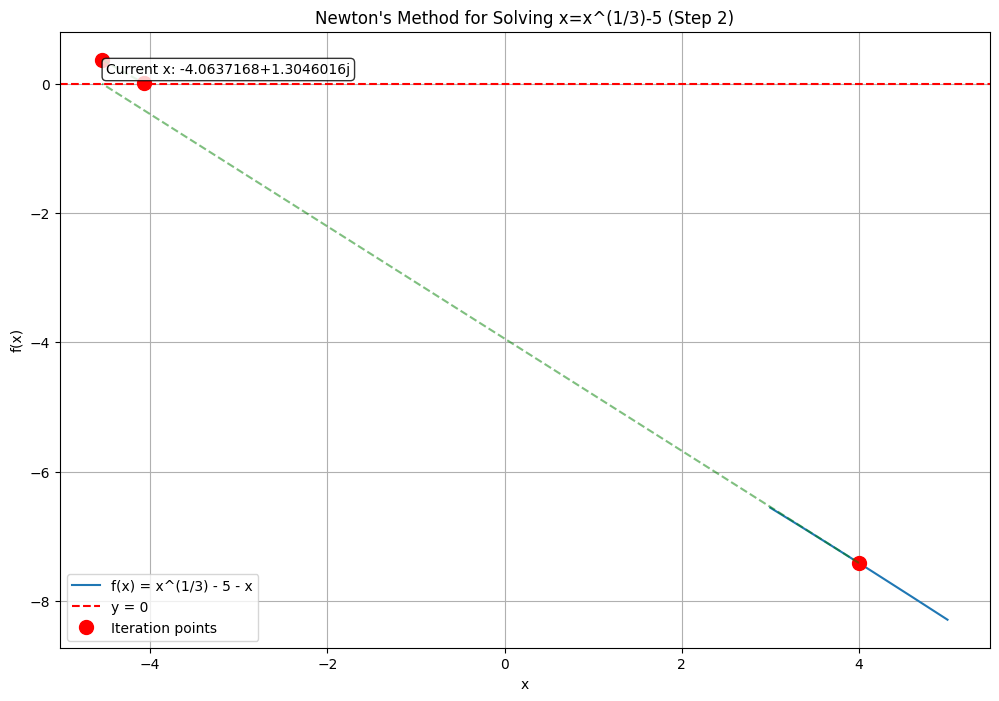

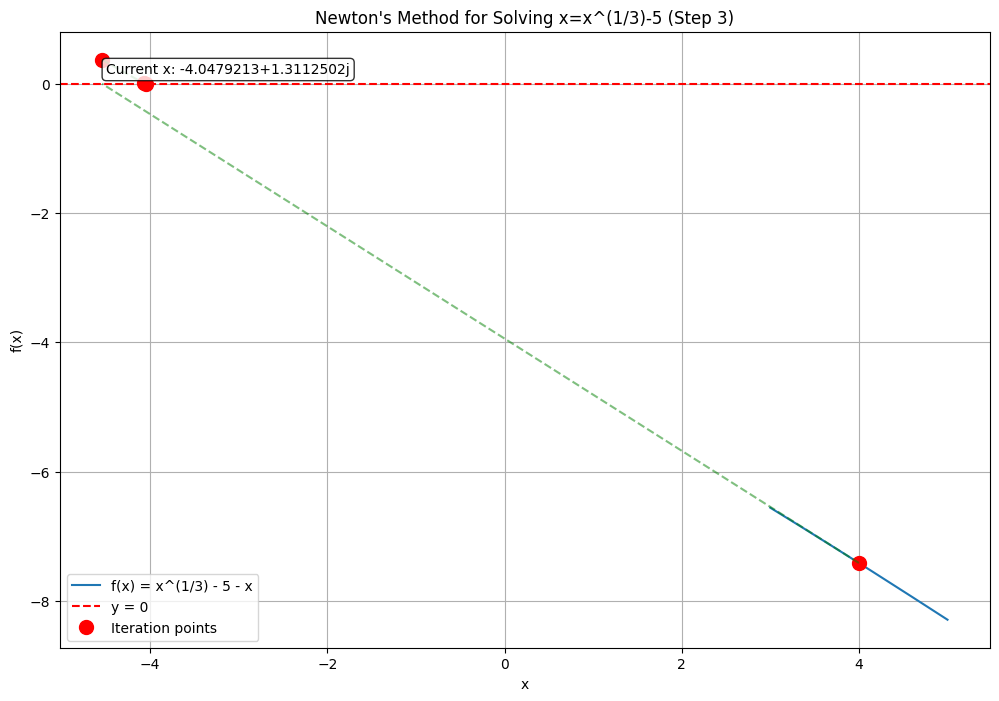

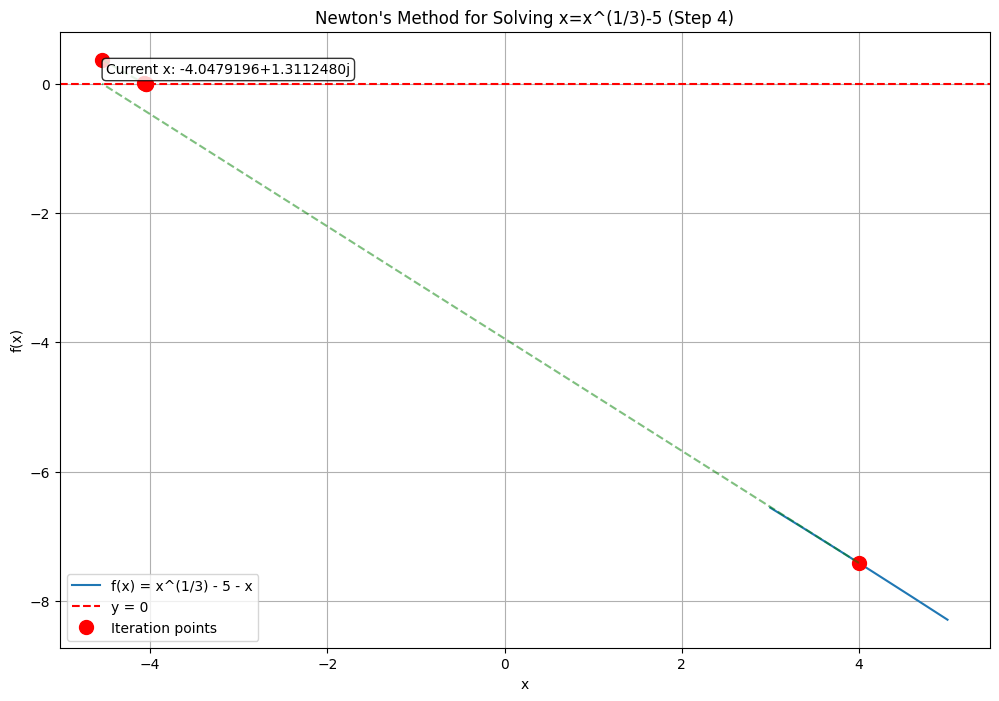

Step-by-step visualization images have been saved.


In [10]:
def f(x):
    return x**(1/3) - 5 - x

def f_prime(x):
    return 1/(3*x**(2/3)) - 1

def newton_method(initial_guess, tolerance=1e-7, max_iterations=100):
    x = initial_guess
    iterations = [x]
    for i in range(max_iterations):
        fx = f(x)
        if abs(fx) < tolerance:
            return x, iterations
        x = x - fx / f_prime(x)
        iterations.append(x)
    return x, iterations

def plot_newton_step(iterations, step):
    x = np.linspace(3, 5, 1000)
    y = f(x)

    plt.figure(figsize=(12, 8))
    plt.plot(x, y, label='f(x) = x^(1/3) - 5 - x')
    plt.axhline(y=0, color='r', linestyle='--', label='y = 0')

    for i in range(step + 1):
        xi = iterations[i]
        if i == 0:
            plt.plot([xi], [f(xi)], 'ro', markersize=10, label='Iteration points')
        else:
            plt.plot([xi], [f(xi)], 'ro', markersize=10)
        
        if i < step:
            x_line = np.linspace(xi, iterations[i+1], 100)
            y_line = f_prime(xi) * (x_line - xi) + f(xi)
            plt.plot(x_line, y_line, 'g--', alpha=0.5)

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f"Newton's Method for Solving x=x^(1/3)-5 (Step {step})")
    plt.legend()
    plt.grid(True)
    
    # Add text box with current x value
    current_x = iterations[step]
    plt.text(0.05, 0.95, f'Current x: {current_x:.7f}', transform=plt.gca().transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # plt.savefig(f'newton_step_{step}.png')
    plt.show()
    plt.close()

# Use Newton's method to solve
initial_guess = 4.0
solution, iterations = newton_method(initial_guess)

print(f"Solution of x=x^(1/3)-5 is approximately: {solution:.7f}")
print(f"Verification: {solution:.7f}^(1/3) - 5 = {solution**(1/3) - 5:.7f}")
print(f"Number of iterations: {len(iterations) - 1}")

# Generate step-by-step visualizations
for i in range(len(iterations)):
    plot_newton_step(iterations, i)

print("Step-by-step visualization images have been saved.")